<a href="https://colab.research.google.com/github/Nawel-Bellil/AI---Deep-Learning--/blob/main/Copie_de_CNN_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.utils import shuffle

import seaborn as sn
import pandas as pd

print('import phase DONE')

import phase DONE


**Cette partie sera chargé de s'occuper de récupérer un dataset, dans le cas d'un dataset fourni à distance, rien de plus facile, il suffit d'utiliser load data de keras, dans le cas d'un dataset qui a été généré localement, il faudra réaliser un nombre important d'opérations**

In [ ]:
#Partie 1 : charger le dataset

(train_img, train_label), (test_img,test_label) = keras.datasets.cifar10.load_data()

print(train_img.shape)
print(train_label.shape)


sizeTr = train_label.shape[0]
sizeTs = test_label.shape[0]

train_label = [train_label[i][0] for i in range(sizeTr)]
test_label = [test_label[i][0] for i in range(sizeTs)]


train_label = np.array(train_label)
test_label = np.array(test_label)

del sizeTr, sizeTs

(50000, 32, 32, 3)
(50000, 1)


In [ ]:
#We only take a part of the dataset
train_image = []
train_labels= []
for i in range(10):
  train_image.append(train_img[5000*i:5000*(i)+1000])
  train_labels.append(train_labels[5000*i:5000*(i)+1000])

# 0-1000 -> 10000

del train_img, train_label
train_img = [item for sublist in train_image for item in sublist]
train_label = [item for sublist in train_labels for item in sublist]

train_img = np.array(train_img)
train_label = np.array(train_label)
print(train_img.shape)

1000
(10000, 32, 32, 3)


1
2
3
4


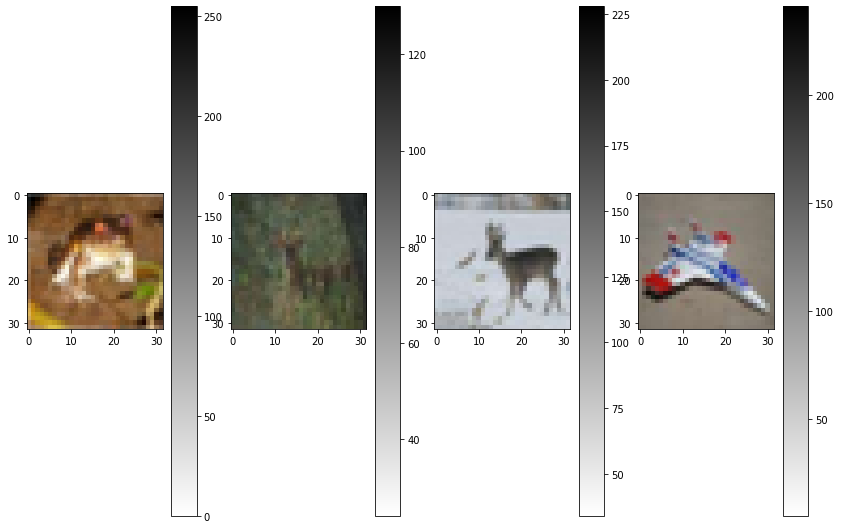

In [ ]:
#Etape 2 : Preprocessing.
### 1-Représenter les 10 classes du dataset.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

#On va afficher une image au hasard
count = 0
plt.figure(figsize=(14,14))
for i in [0,10,20,30]:
  count +=1
  plt.subplot(1,4,count)
  plt.imshow(train_img[i],cmap=plt.cm.binary)
  plt.colorbar()
  print(count)
  plt.grid(False)
plt.show()

Visualisation de CIFAR10


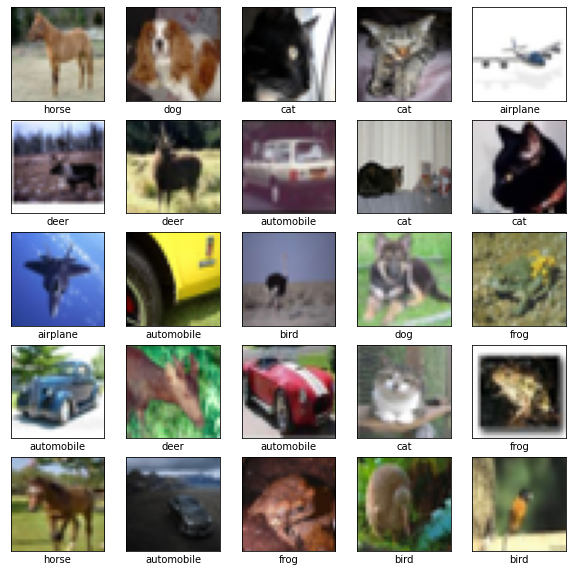

In [ ]:
#Partie 3 : Data normalisation

#Data normalisation entre 0 et 1
train_img, test_img = train_img/255.0, test_img /255.0

#Partage entre train et validation.
X_train, X_val, Y_train, Y_val = train_test_split(train_img, train_label,test_size=0.33)

del train_img, train_label

#Montrer le résultat de la normalisation
print("Visualisation de CIFAR10")
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y_train[i]])

plt.show()

In [ ]:
#Nouvelle partie : Data augmentation
train_dataset = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1
)
train_dataset.fit(X_train)

val_dataset= ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1
)

val_dataset.fit(X_val)

In [ ]:
#Etape 3 : mise en place du réseau de neuronnes.

model = keras.Sequential([
        #Couche d'input si on veut être aussi précis
        layers.Input(shape=(32,32,3)),
        #Bloc numéro 1 de VGG
        layers.Conv2D(64,(3,3),dilation_rate=1,padding="same",
                      kernel_initializer="glorot_normal",activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(64,(3,3),dilation_rate=1,padding="same",activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(0.35),

        #Bloc numéro 2 de VGG
        layers.Conv2D(64,(3,3),dilation_rate=1,padding="same",activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(64,(3,3),dilation_rate=1,padding="same",activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(0.35),

        #Bloc numéro 3 de VGG
        layers.Conv2D(128,(3,3),dilation_rate=1,padding="same",activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(128,(3,3),dilation_rate=1,padding="same",activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(0.35),

        #On commence par applatir notre donnée avec Flatten.
        layers.Flatten(),
        #Couches fully connected
        layers.Dense(256,activation="relu"),
        layers.Dropout(0.35),
        layers.Dense(128,activation="relu"),
        layers.Dropout(0.35),
        #Sortie avec 10 classes
        layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        3

In [ ]:
#Etape 4 : Teste sur la base d'apprentissage
model.compile(optimizer='Nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#With Validation
model.fit(train_dataset.flow(X_train,Y_train),
          validation_data=val_dataset.flow(X_val,Y_val),
          epochs=100,steps_per_epoch=len(X_train)/32,
          batch_size=32)

Epoch 1/100
1046/1046 [==============================] - 30s 27ms/step - loss: 0.4521 - accuracy: 0.8531 - val_loss: 0.5061 - val_accuracy: 0.8388
Epoch 2/100
1046/1046 [==============================] - 28s 27ms/step - loss: 0.4602 - accuracy: 0.8479 - val_loss: 0.4190 - val_accuracy: 0.8590
Epoch 3/100
1046/1046 [==============================] - 28s 27ms/step - loss: 0.4426 - accuracy: 0.8513 - val_loss: 0.4218 - val_accuracy: 0.8620
Epoch 4/100
1046/1046 [==============================] - 28s 26ms/step - loss: 0.4482 - accuracy: 0.8516 - val_loss: 0.4448 - val_accuracy: 0.8528
Epoch 5/100
1046/1046 [==============================] - 28s 27ms/step - loss: 0.4377 - accuracy: 0.8548 - val_loss: 0.4213 - val_accuracy: 0.8585
Epoch 6/100
1046/1046 [==============================] - 28s 27ms/step - loss: 0.4323 - accuracy: 0.8564 - val_loss: 0.4349 - val_accuracy: 0.8548
Epoch 7/100
1046/1046 [==============================] - 28s 26ms/step - loss: 0.4350 - accuracy: 0.8548 - val_loss: 0

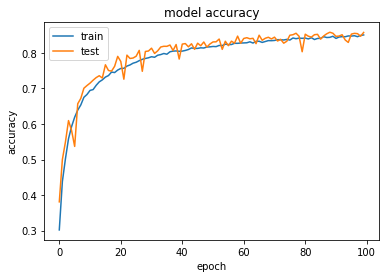

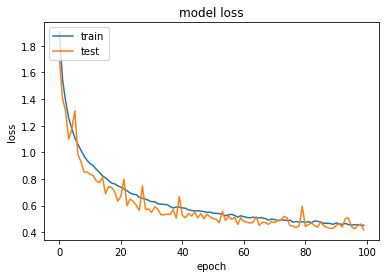

In [ ]:
#Histoire de l'évolution du résultat
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Evaluation du modèle.
test_loss, test_acc = model.evaluate(test_img,  test_label, verbose=2)

print('\nTest accuracy:', test_acc *100, '%')

313/313 - 1s - loss: 0.3853 - accuracy: 0.8817

Test accuracy: 88.16999793052673 %


In [ ]:
#Partie Finale : prédiction

predictions = model.predict(test_images)
print(predictions[0])

#Un exemple avec la matrice de confusion
test_pred = [np.argmax(predictions[i]) for i in range(len(predictions))]

matriceConfusion = confusion_matrix(test_labels,test_pred)

print(matriceConfusion)
for i in range(10):
  print("predicted : {}, actual class : {} ".format(np.argmax(predictions[i]),test_labels[i]))

In [ ]:
#Visualiser la matrice de confusion
df_cm = pd.DataFrame(matriceConfusion, index = [i for i in class_names],
                  columns = [i for i in class_names])

plt.figure(figsize = (20,14))
sn.heatmap(df_cm, annot=True)

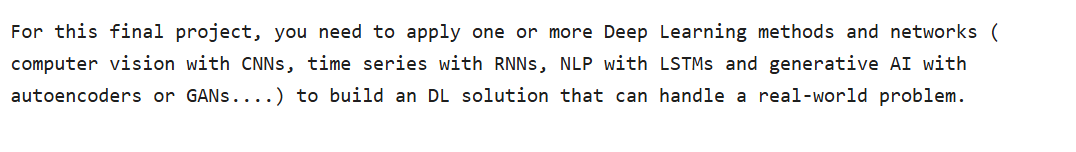

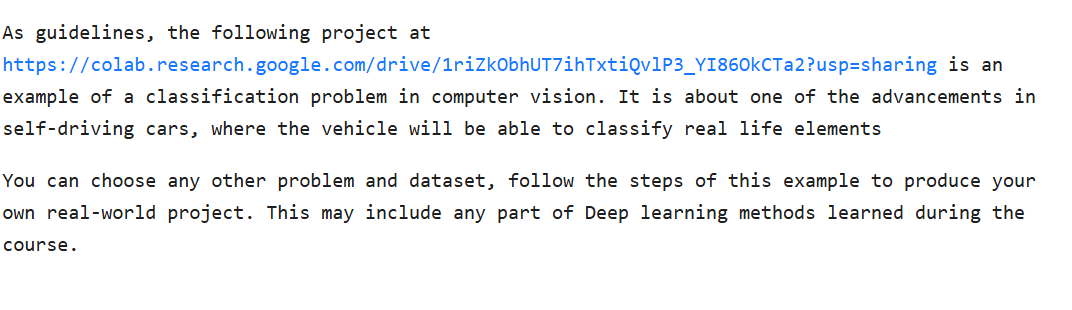